# $Explore$ $Zillow$

### Imports

In [93]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
import explore as e

In [2]:
# wrangel zillow data
df = w.wrangle_single_family_residential()

In [3]:
# shape of data after dropping NAN and Nulls
df.shape

(2140235, 8)

In [4]:
df.columns

Index(['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips', 'home_age'],
      dtype='object')

In [5]:
df = w.remove_outliers(df,['bedroom','bathroom','squarefeet','taxamount','tax_value'])

In [6]:
df.shape

(2045591, 8)

In [7]:
# % of data taken out after removing outliers
1-(2045591/2140235)

0.044221312145628855

### 2 Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [8]:
# Split data to train , test validate, using random state 123
train, validate, test = w.split_data(df)

In [9]:
# shape of train
train.shape

(1145530, 8)

In [10]:
# firs look at train data
train.head()

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips,home_age
717802,3.0,1.0,1444.0,186626.0,1951.0,2317.93,Los Angeles,66
664602,3.0,3.0,2780.0,1232286.0,1950.0,13695.20,Orange,67
91875,2.0,1.0,1171.0,457654.0,1941.0,5390.11,Los Angeles,76
1390318,5.0,3.0,2045.0,452403.0,1947.0,5639.63,Los Angeles,70
1287692,3.0,2.0,1874.0,194212.0,1957.0,2747.44,Los Angeles,60


In [11]:
# stats in zillow train set
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,1145530.0,3.259219,0.867344,1.00,3.00,3.00,4.000,6.0
bathroom,1145530.0,2.145738,0.816433,0.00,2.00,2.00,3.000,5.5
squarefeet,1145530.0,1755.175390,706.711421,1.00,1246.00,1594.00,2117.000,4962.0
tax_value,1145530.0,374484.104664,263544.846670,22.00,183600.00,316212.00,500000.000,1454758.0
yearbuilt,1145530.0,1960.345694,21.573368,1801.00,1949.00,1958.00,1974.000,2016.0
taxamount,1145530.0,4624.432814,3035.349395,16.48,2477.52,3973.37,6024.395,17483.7
home_age,1145530.0,56.654306,21.573368,1.00,43.00,59.00,68.000,216.0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145530 entries, 717802 to 1699654
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedroom     1145530 non-null  float64
 1   bathroom    1145530 non-null  float64
 2   squarefeet  1145530 non-null  float64
 3   tax_value   1145530 non-null  float64
 4   yearbuilt   1145530 non-null  float64
 5   taxamount   1145530 non-null  float64
 6   fips        1145530 non-null  object 
 7   home_age    1145530 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 78.7+ MB


In [13]:
# name of columns in train
train.columns

Index(['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips', 'home_age'],
      dtype='object')

In [14]:
train.fips.value_counts()

Los Angeles    762402
Orange         293957
Ventura         89171
Name: fips, dtype: int64

fips will be taken out because it is a county code 


In [15]:
# sample= train.sample(1_000, random_state=123)

In [16]:
train.describe()

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,home_age
count,1.145530e+06,1.145530e+06,1.145530e+06,1.145530e+06,1.145530e+06,1.145530e+06,1.145530e+06
mean,3.259219e+00,2.145738e+00,1.755175e+03,3.744841e+05,1.960346e+03,4.624433e+03,5.665431e+01
std,8.673444e-01,8.164329e-01,7.067114e+02,2.635448e+05,2.157337e+01,3.035349e+03,2.157337e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,1.648000e+01,1.000000e+00
25%,3.000000e+00,2.000000e+00,1.246000e+03,1.836000e+05,1.949000e+03,2.477520e+03,4.300000e+01
50%,3.000000e+00,2.000000e+00,1.594000e+03,3.162120e+05,1.958000e+03,3.973370e+03,5.900000e+01
75%,4.000000e+00,3.000000e+00,2.117000e+03,5.000000e+05,1.974000e+03,6.024395e+03,6.800000e+01
max,6.000000e+00,5.500000e+00,4.962000e+03,1.454758e+06,2.016000e+03,1.748370e+04,2.160000e+02


In [17]:
train[train.tax_value<100]

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips,home_age
2125248,3.0,1.0,1128.0,23.0,1925.0,427.61,Los Angeles,92
1619739,2.0,1.0,800.0,23.0,1922.0,403.33,Los Angeles,95
1765721,2.0,1.0,943.0,22.0,1949.0,135.93,Los Angeles,68
2002187,4.0,2.0,2378.0,22.0,2006.0,990.26,Los Angeles,11
2023880,4.0,2.0,1237.0,22.0,1957.0,1595.67,Los Angeles,60


In [18]:
# columns of interest as potenital usage in model
columns = ['bedroom', 'bathroom', 'squarefeet', 'yearbuilt',
       'taxamount','home_age','fips']

In [19]:
# correaltion between variables
zillow_corr = train.corr(method='spearman')
zillow_corr

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,home_age
bedroom,1.000000,0.613833,0.640010,0.253994,0.427151,0.255611,-0.427151
bathroom,0.613833,1.000000,0.809514,0.428926,0.577584,0.428486,-0.577584
squarefeet,0.640010,0.809514,1.000000,0.472636,0.513502,0.469909,-0.513502
tax_value,0.253994,0.428926,0.472636,1.000000,0.275767,0.976575,-0.275767
yearbuilt,0.427151,0.577584,0.513502,0.275767,1.000000,0.273821,-1.000000
taxamount,0.255611,0.428486,0.469909,0.976575,0.273821,1.000000,-0.273821
home_age,-0.427151,-0.577584,-0.513502,-0.275767,-1.000000,-0.273821,1.000000


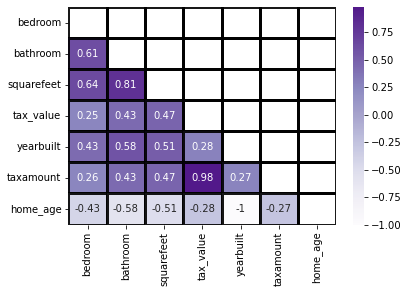

In [20]:
# pass my correlation matrix to Seaborn's heatmap 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr), **kwargs)
plt.show()

### outliers Taken out
The strongest correlation is tax_value and taxamount at 0.98 The strongest correlation is squarefeet vs bathrooms at 0.81
* Next strongest is squarefeet vs bedrooms at 0.64
* Next strongest is bathroom vs bedroom at 0.62
* Others above 0.50:
  * yearbuild(age) vs bathrooms at 0.57
  * taxammount vs squarefeet at 0.50
  * year built(home_age) vs squarefeet at 0.51
  * year built(home_age) vs bathroom 0.57
The target is tax_value has a strong correlation with taxamount (0.98), and a correlation of (0.48) with squarefeet

### with outliers
The strongest correlation is tax_value and taxamount at 0.98
The strongest correlation is squarefeet vs bathrooms at 0.83

* Next strongest is  squarefeet vs bedrooms at 0.66
* Next  strongest is  bathroom vs bedroom at 0.63
* Others above 0.5:
        * yearbuild(age) vs bathrooms at 0.57
        * taxammount vs squarefeet at 0.52
        * year built(age) vs squarefeet at 0.51
        
The **target is tax_value** has a strong correlation with taxamount (0.98), and a correlation of (0.52) with squarefeet 
        

In [21]:
X = train[[ 'yearbuilt',
       'taxamount','bedroom','home_age']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,yearbuilt,34.779007
1,taxamount,1.117902
2,bedroom,1.205506
3,home_age,8.837246


In [22]:
X = train[['bedroom', 'bathroom', 'squarefeet' ,
       'taxamount','home_age' ]]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,bedroom,20.960022
1,bathroom,24.331871
2,squarefeet,24.761713
3,taxamount,4.724514
4,home_age,4.277621


In [23]:
X = train[[ 'bathroom' ,
       'taxamount','home_age']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,bathroom,5.639147
1,taxamount,4.190603
2,home_age,2.865844


### might use these features for model since the combination had the most independence 
* 'squarefeet' ,'taxamount','bedroom'
* 'squarefeet' ,'taxamount','age'

### Maybe these features but there is a vif score above 5 in (bedroom/bathroom)
* 'squarefeet' , 'taxamount','age', 'bedroom'(7.22)
* 'squarefeet' , 'taxamount','age', 'bathroom'(6.38)

###  * Still need to see which ones have an association with target variable

## After taking outlier out previous groups VIF changed 
    * maybe use taxamount and square feet

### 3.  Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [24]:
# how to create a list from train columns
col = train.columns.to_list()

### reverse the columns
col.reverse()

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145530 entries, 717802 to 1699654
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedroom     1145530 non-null  float64
 1   bathroom    1145530 non-null  float64
 2   squarefeet  1145530 non-null  float64
 3   tax_value   1145530 non-null  float64
 4   yearbuilt   1145530 non-null  float64
 5   taxamount   1145530 non-null  float64
 6   fips        1145530 non-null  object 
 7   home_age    1145530 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 78.7+ MB


In [33]:
columns

['bedroom',
 'bathroom',
 'squarefeet',
 'yearbuilt',
 'taxamount',
 'home_age',
 'fips']

In [34]:
def plot_variable_pair(df):
    columns = ['bedroom',
 'bathroom',
 'squarefeet',
 'yearbuilt',
 'taxamount',
 'home_age',
 'fips']
    for i, col in enumerate(columns):
        sns.lmplot(data=df, x=col, y='tax_value', line_kws={'color':'red'})
        plt.show()

def plot_variable_pair1(df):
    columns = df.columns.to_list()
    for i, col in enumerate(columns):
        subplot_number = i + 1
        plt.subplot(1,4,subplot_number)
        plt.title(col)
        sns.lmplot(data=df, x=df[col], y='tax_value', line_kws={'color':'red'})
        plt.show()

In [27]:
train.describe()

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,home_age
count,1.145530e+06,1.145530e+06,1.145530e+06,1.145530e+06,1.145530e+06,1.145530e+06,1.145530e+06
mean,3.259219e+00,2.145738e+00,1.755175e+03,3.744841e+05,1.960346e+03,4.624433e+03,5.665431e+01
std,8.673444e-01,8.164329e-01,7.067114e+02,2.635448e+05,2.157337e+01,3.035349e+03,2.157337e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,1.648000e+01,1.000000e+00
25%,3.000000e+00,2.000000e+00,1.246000e+03,1.836000e+05,1.949000e+03,2.477520e+03,4.300000e+01
50%,3.000000e+00,2.000000e+00,1.594000e+03,3.162120e+05,1.958000e+03,3.973370e+03,5.900000e+01
75%,4.000000e+00,3.000000e+00,2.117000e+03,5.000000e+05,1.974000e+03,6.024395e+03,6.800000e+01
max,6.000000e+00,5.500000e+00,4.962000e+03,1.454758e+06,2.016000e+03,1.748370e+04,2.160000e+02


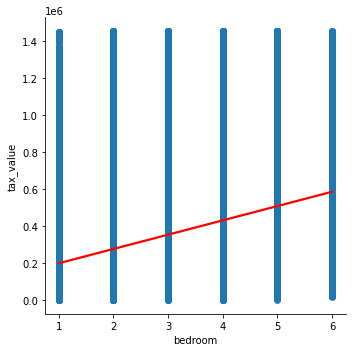

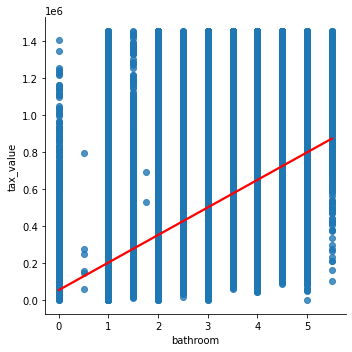

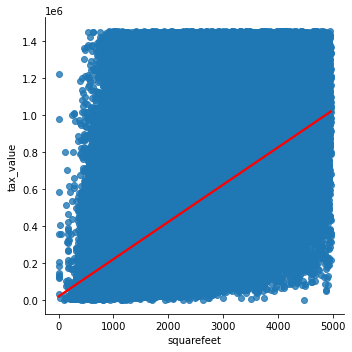

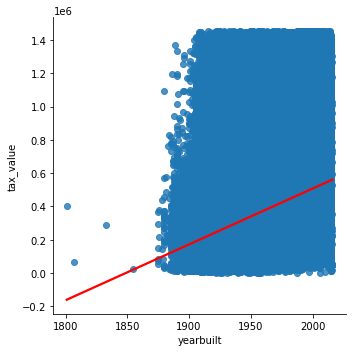

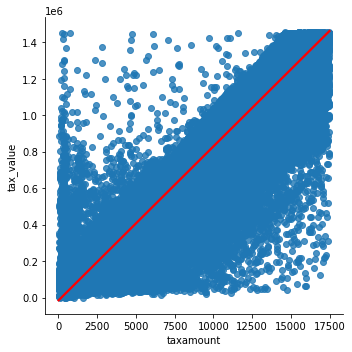

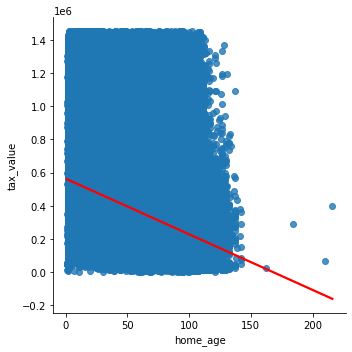

ValueError: could not convert string to float: 'Los Angeles'

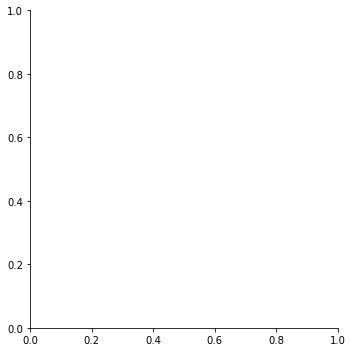

In [35]:
plot_variable_pair(train)

In [ ]:
sns.jointplot(data=train, x='bedroom', y='tax_value', kind='reg')

Normal distribution, linear function has a positive slope close to 0.

In [ ]:
sns.jointplot(data=train, x='bathroom', y='tax_value', kind='reg')

normal distribution, slope is positive

In [ ]:
sns.jointplot(data=train, x='squarefeet', y='tax_value', kind='reg')

In [ ]:
Outliers are skewing the data here

In [ ]:
sns.jointplot(data=train, x='yearbuilt', y='tax_value', kind='reg')

line has a slope close to 0

In [ ]:
sns.jointplot(data=train, x='taxamount', y='tax_value', kind='reg')

Strong positive correlation, outliers are present but doent seem to skew at this axis scale

In [ ]:
sns.jointplot(data=train, x='age', y='tax_value', kind='reg')

Slope is close to 0

In [ ]:
sns.pairplot(data=train.drop(columns='fips'),
            corner=True,kind='reg')
plt.show()

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [40]:
train['bedroom']=train.bedroom.astype('object')
train['bathroom']=train.bathroom.astype('object')


In [41]:
train.dtypes

bedroom        object
bathroom       object
squarefeet    float64
tax_value     float64
yearbuilt     float64
taxamount     float64
fips           object
home_age        int64
dtype: object

In [ ]:
# sample of train for faster processing
# sample= train.sample(1_000, random_state=123)

In [44]:
train.columns.to_list()

['bedroom',
 'bathroom',
 'squarefeet',
 'tax_value',
 'yearbuilt',
 'taxamount',
 'fips',
 'home_age']

In [55]:
train['home_age'].dtypes 

dtype('int64')

In [61]:
numerical

['squarefeet', 'tax_value', 'yearbuilt', 'taxamount', 'home_age']

In [60]:
categorical =[]
numerical =[]
for i in train.columns.to_list():
    if train[i].dtypes == 'O':
        categorical.append(i)
    else:
        numerical.append(i)

bedroom
bathroom
fips


In [91]:
def plot_categorical_and_continuous_vars2(df):
    categorical =[]
    numerical =[]
    for i in train.columns.to_list():
        if train[i].dtypes == 'O':
            categorical.append(i)
        else:
            numerical.append(i)
    for col in categorical:
        for col2 in numerical:
            fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(25,5))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            sns.scatterplot(data=df, x=col, y=col2, ax=ax4)
            plt.show()
    
    

In [ ]:
plot_categorical_and_continuous_vars2(train)

In [69]:
train['home_age'].astype('float')

717802      66.0
664602      67.0
91875       76.0
1390318     70.0
1287692     60.0
           ...  
122849      38.0
1505697     38.0
105279      62.0
1188418    102.0
1699654     53.0
Name: home_age, Length: 1145530, dtype: float64

In [70]:
cat_vars = ['bathroom', 'bedroom', 'fips']
cont_vars = ['taxamount', 'tax_value', 'yearbuilt','home_age']

In [62]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            plt.show()


In [ ]:
plot_categorical_and_continuous_vars(train,cat_vars, cont_vars)

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [96]:
# show explor.py file in terminal
! ls

README.md                        modeling.ipynb
__pycache__                      prepare.py
acquire_regression_lesson.ipynb  regression_evaluate.ipynb
env.py                           regression_explore.ipynb
evaluate.ipynb                   scaling.ipynb
evaluate.py                      scaling_lesson.ipynb
explore.py                       student_grades.csv
explore_zillow.ipynb             wrangle.ipynb
feature_engineering.ipynb        wrangle.py
feature_engineering_lesson.ipynb zillow.csv


### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

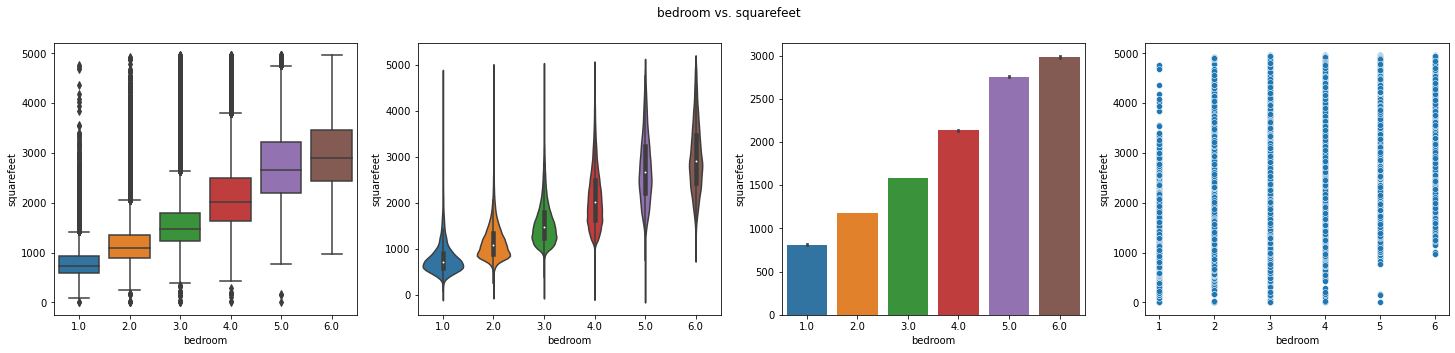

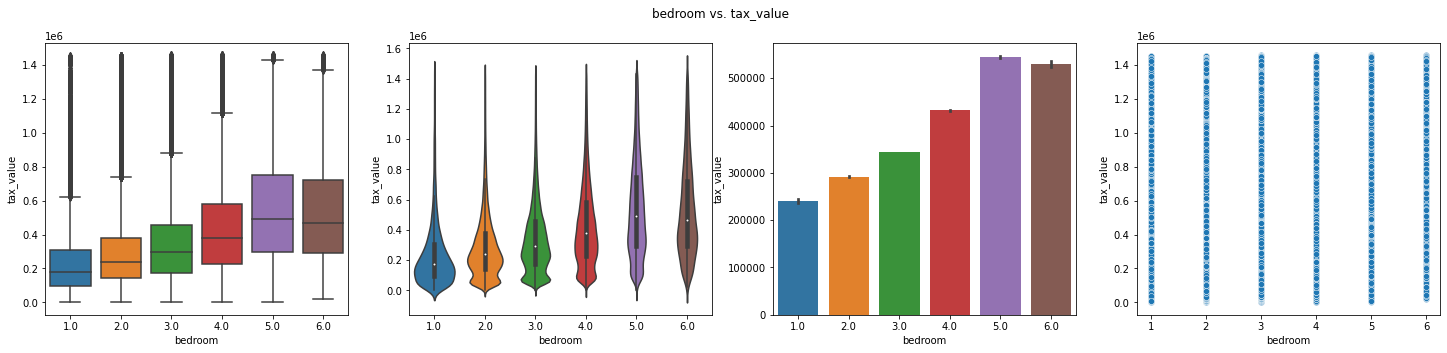

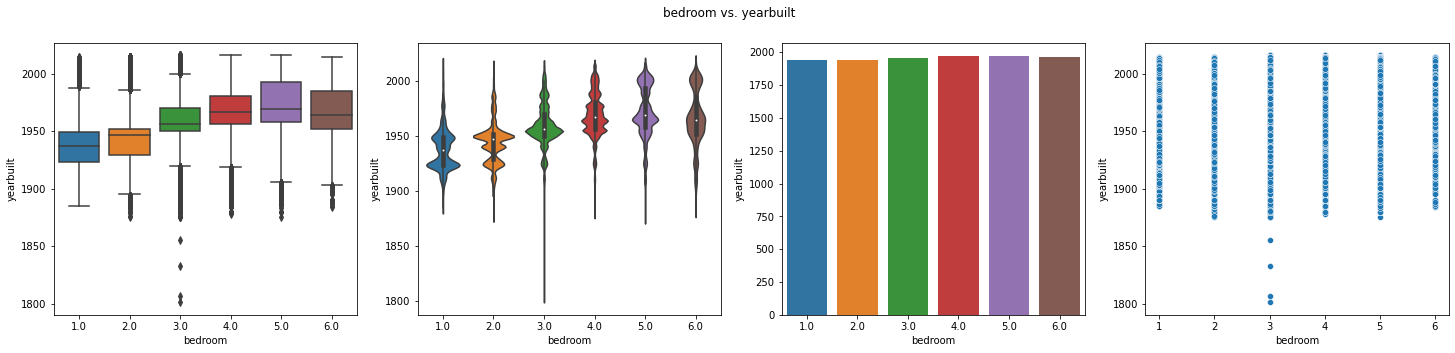

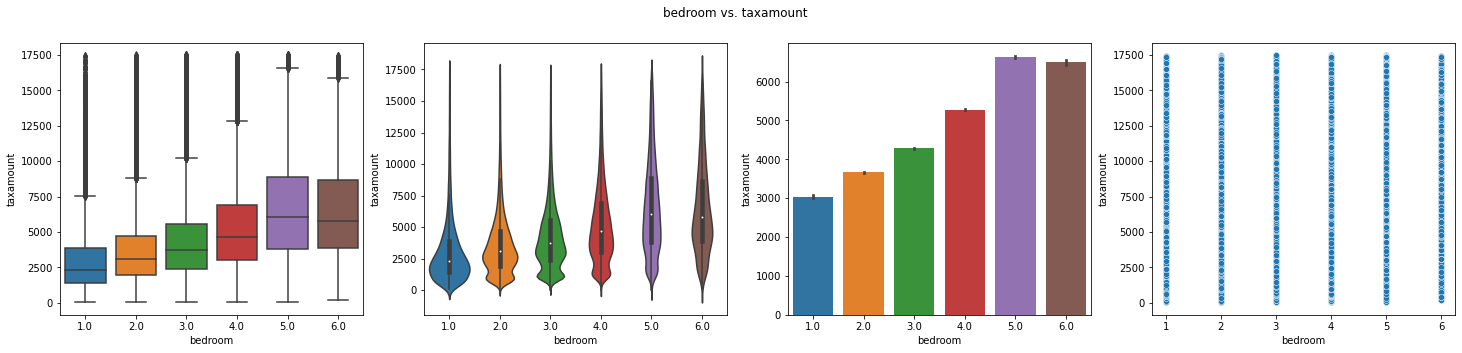

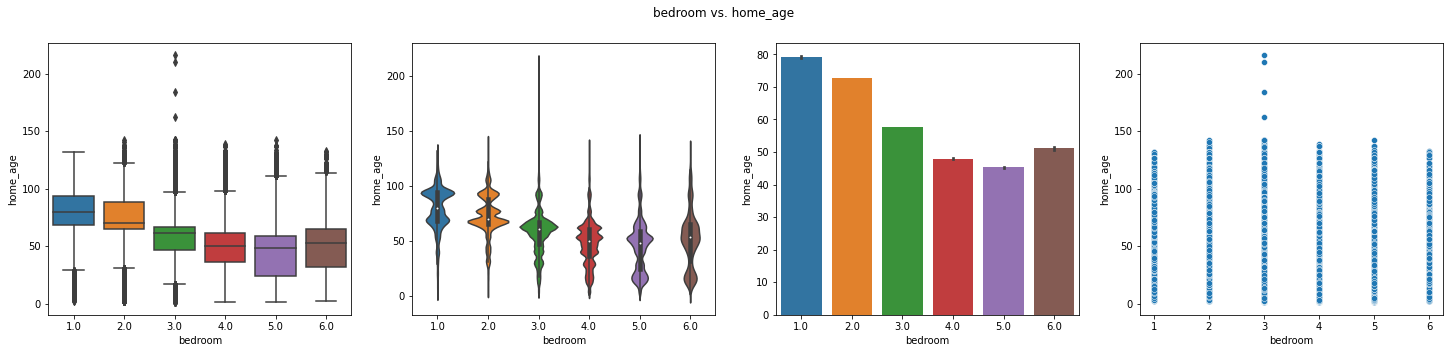

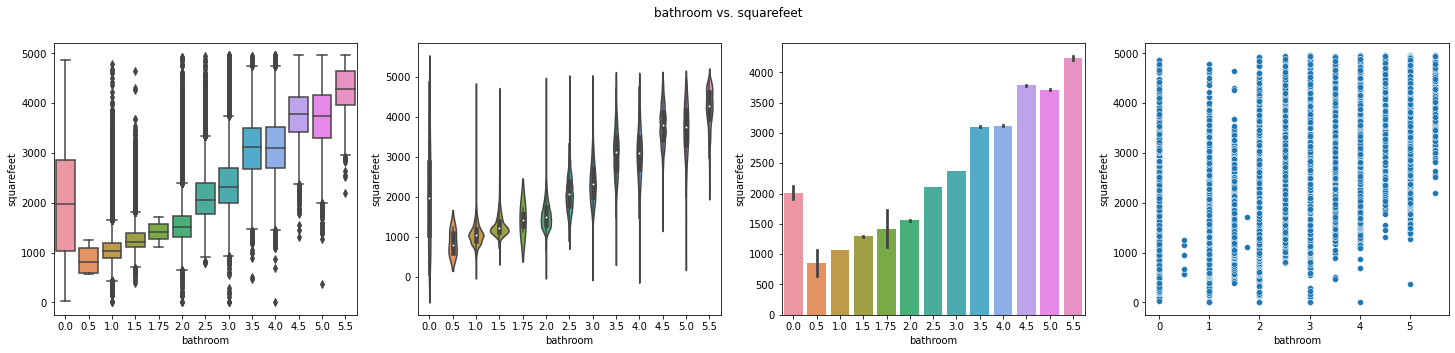

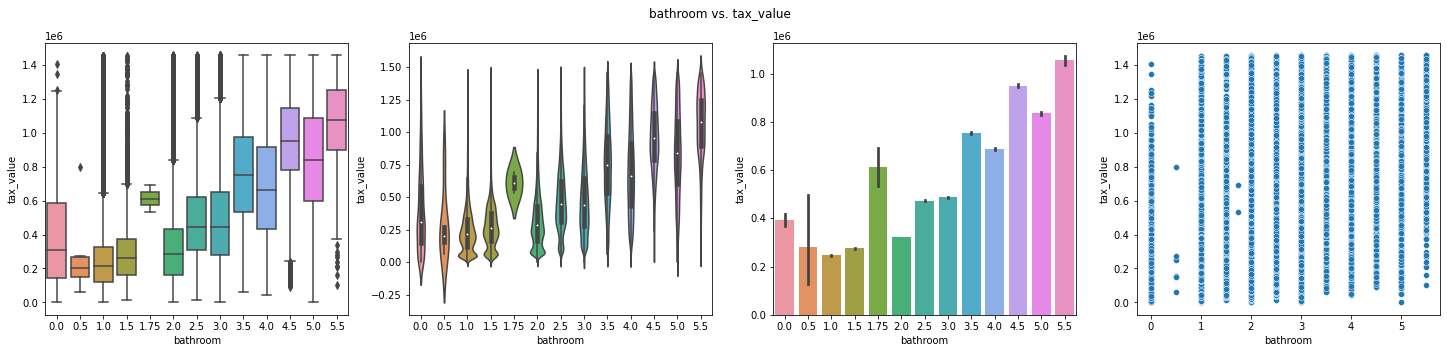

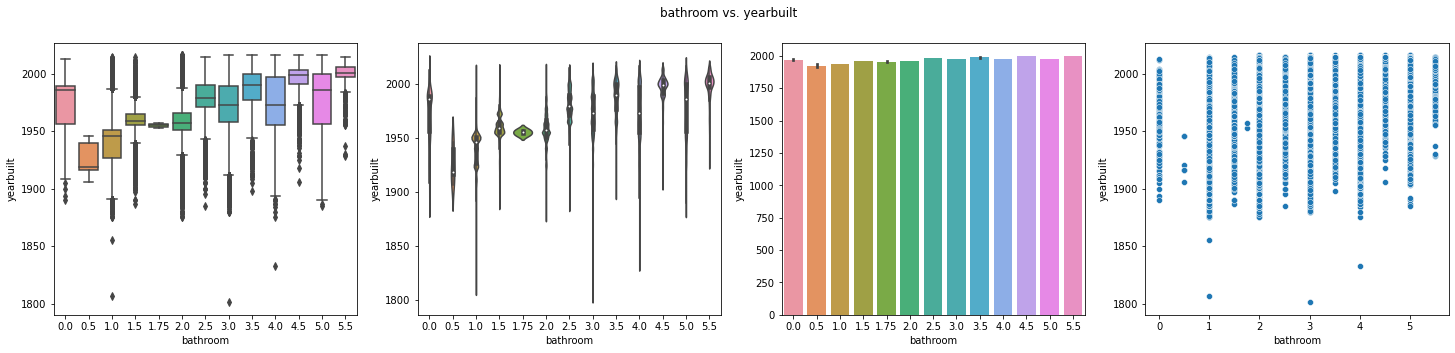

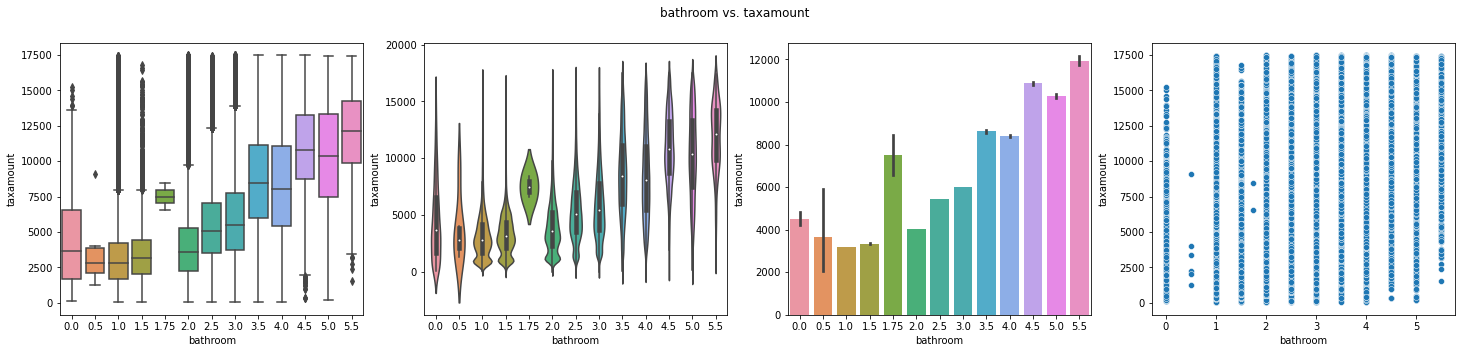

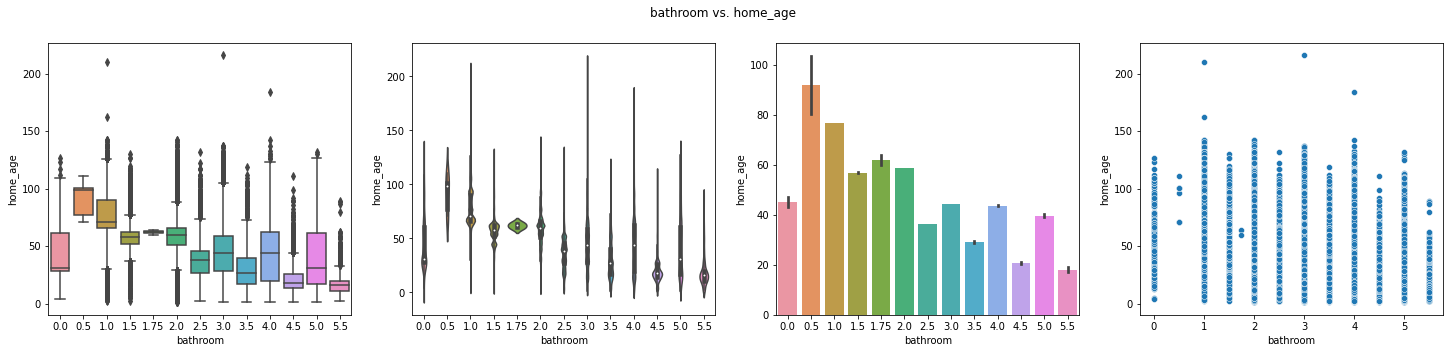

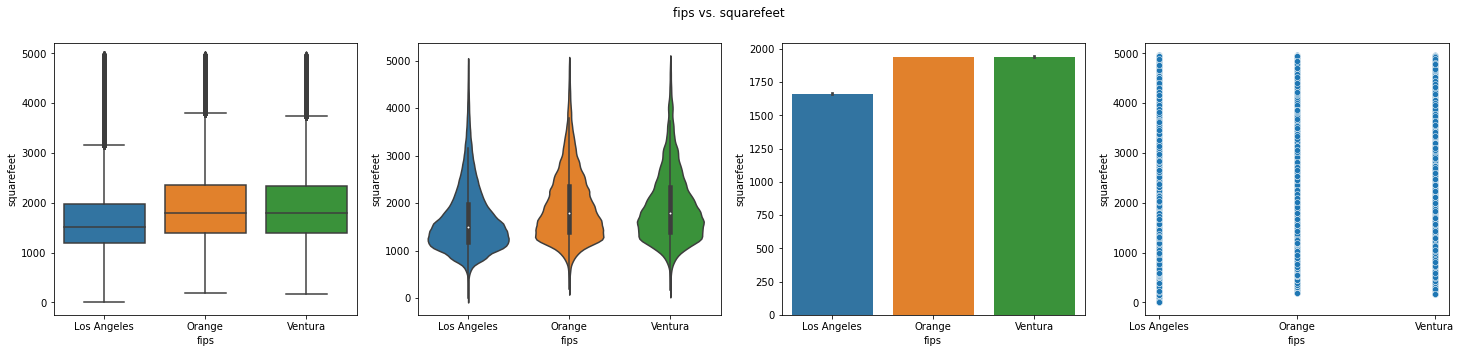

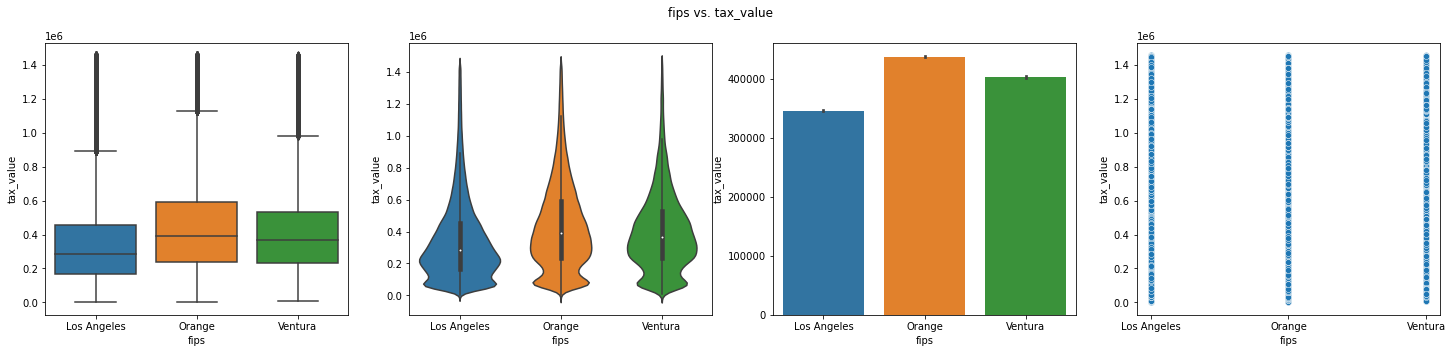

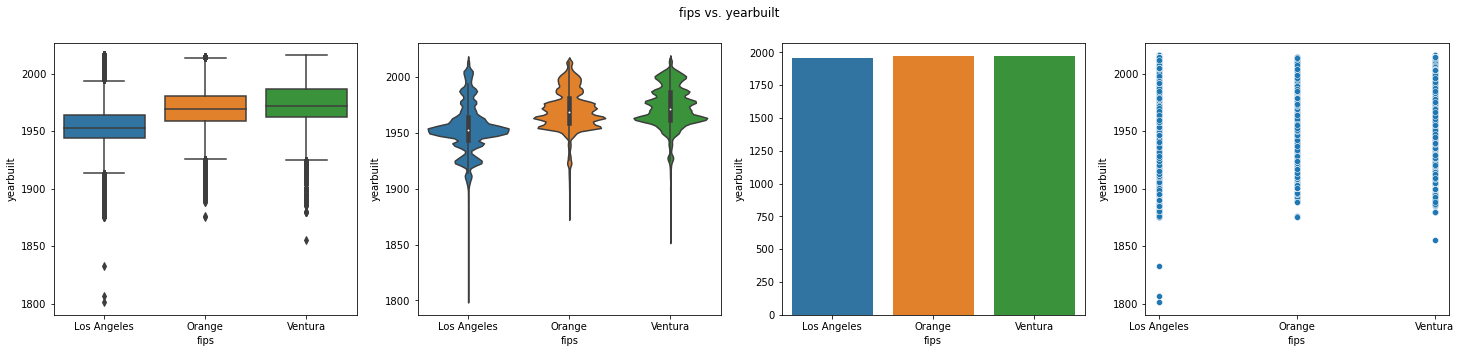

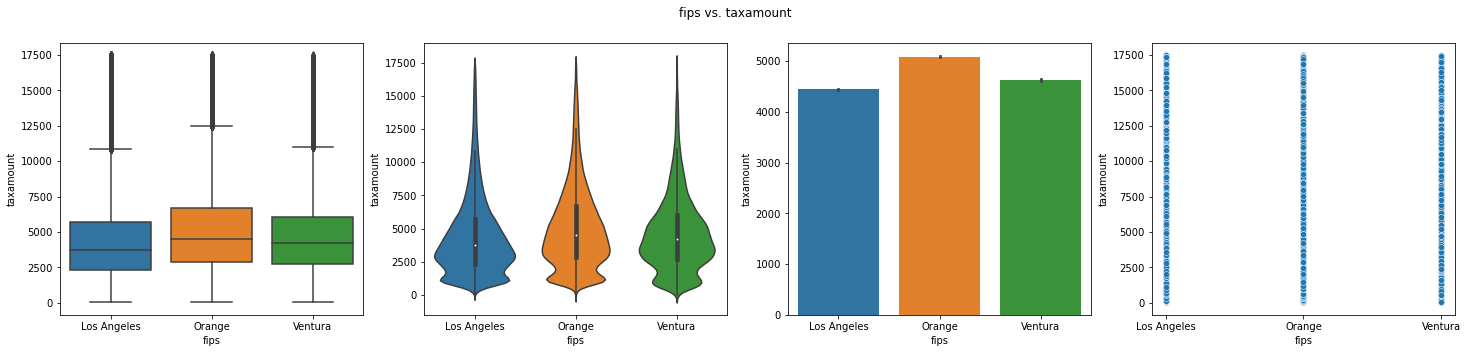

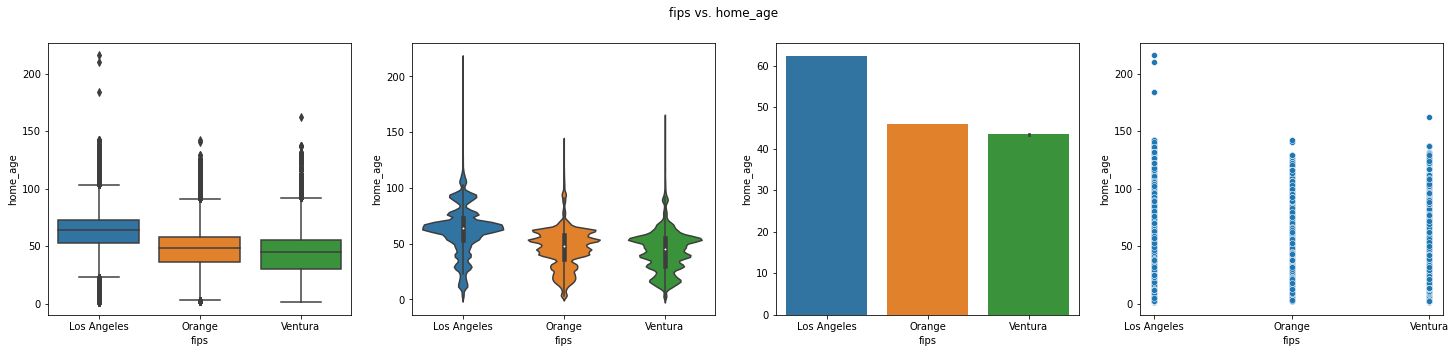

In [95]:
e.plot_categorical_and_continuous_vars2(train)

In [ ]:
cat_vars = ['bathroom', 'bedroom', 'fips']
cont_vars = ['taxamount', 'tax_value', 'yearbuilt','home_age']

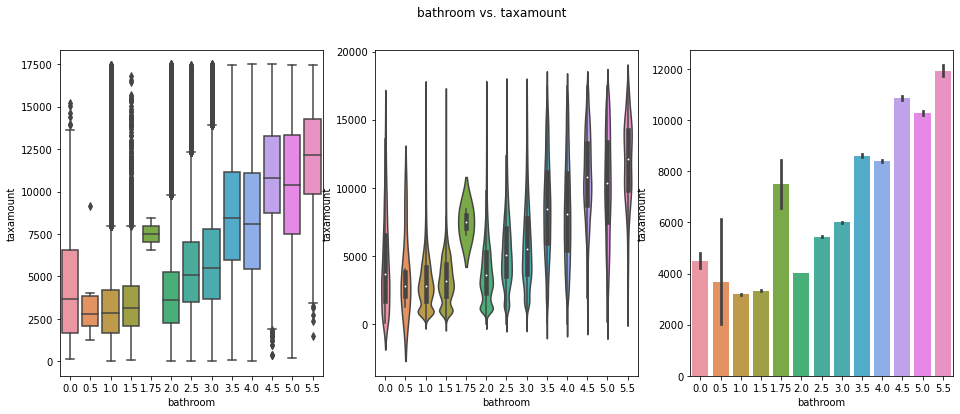

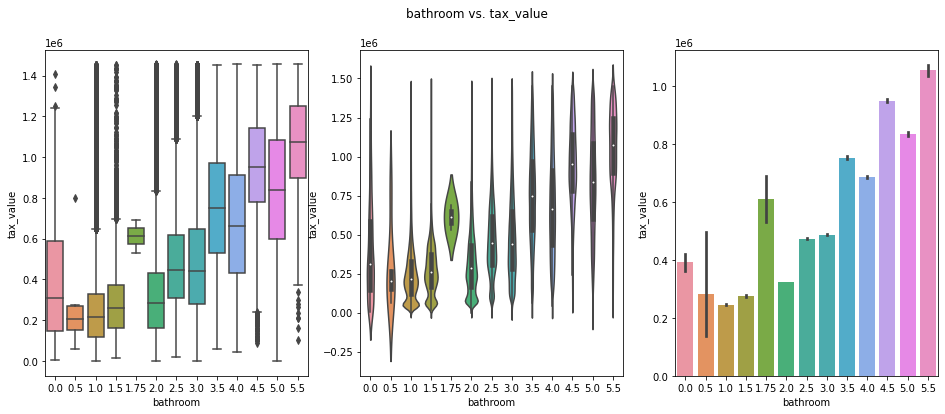

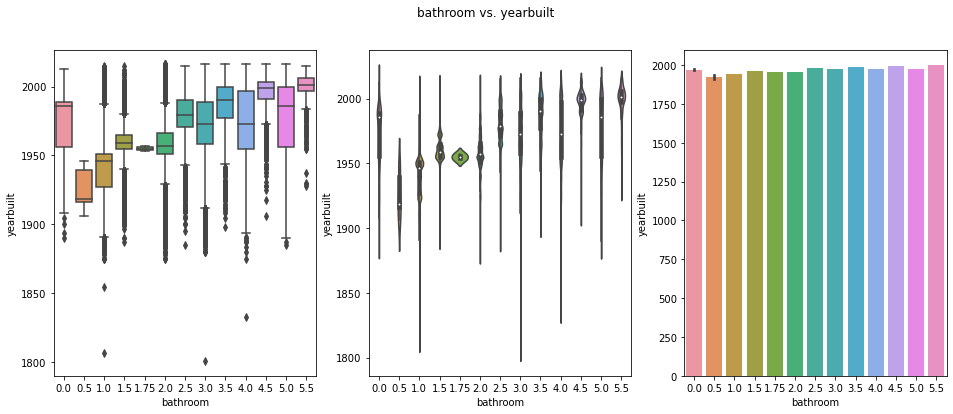

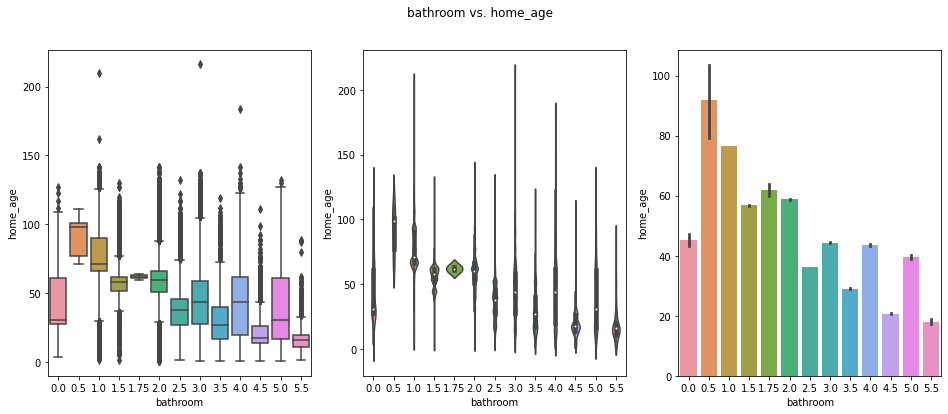

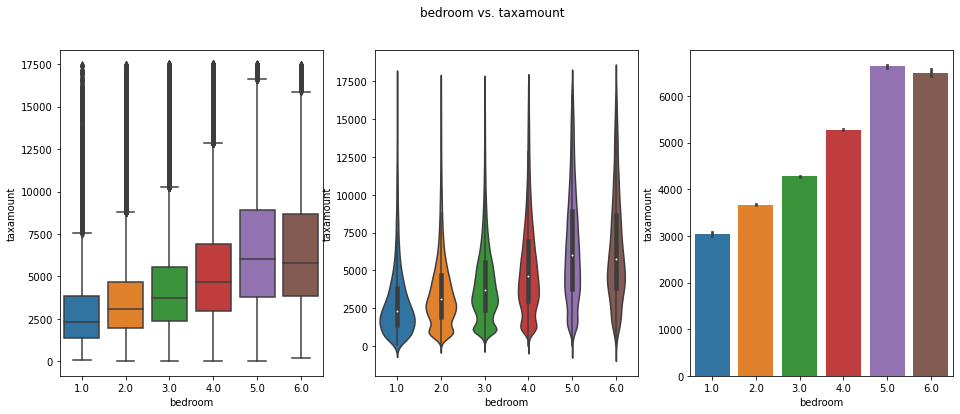

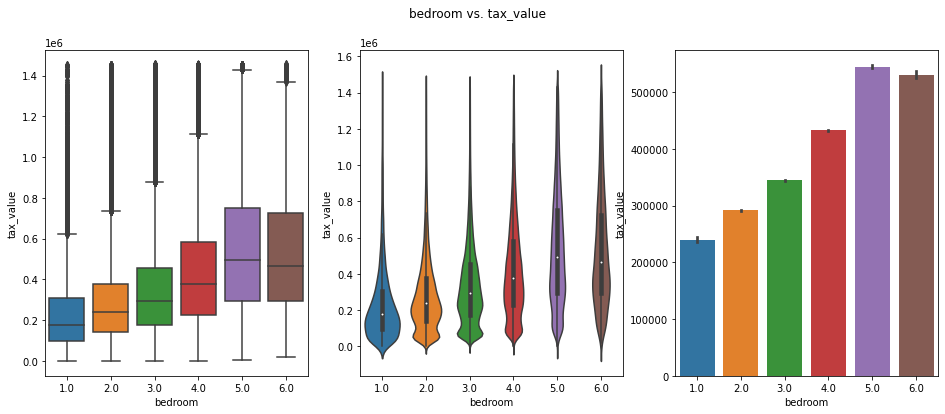

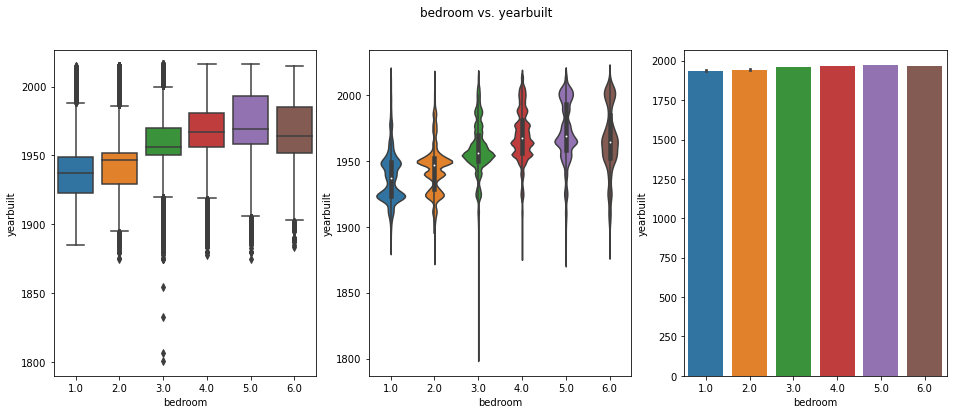

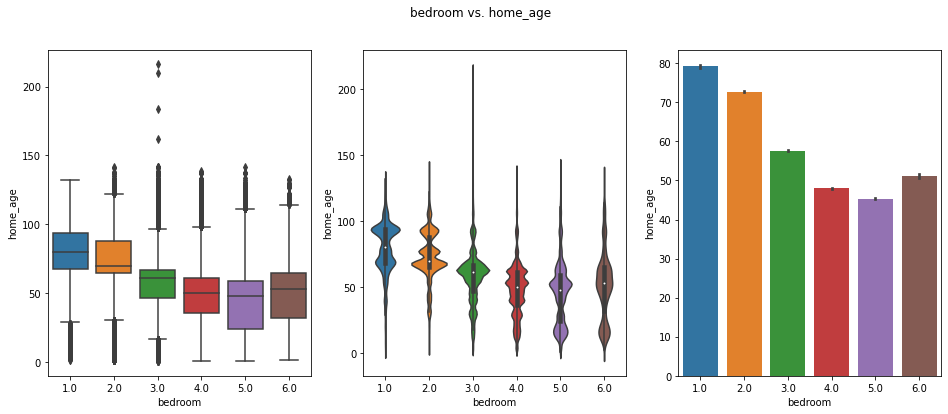

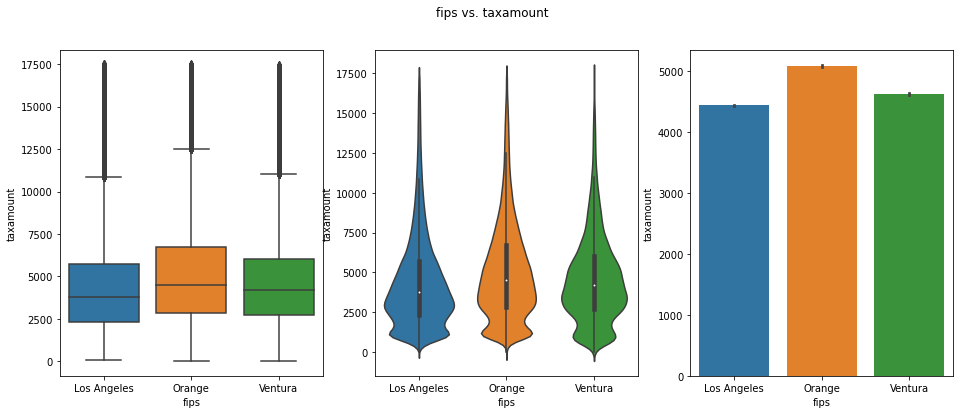

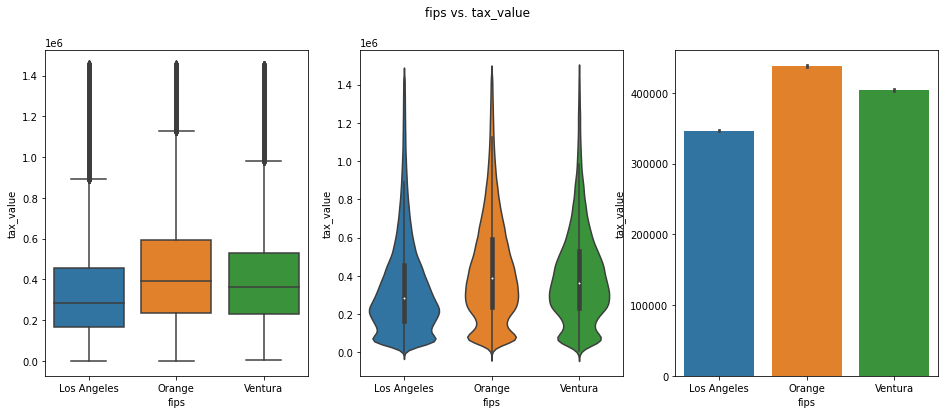

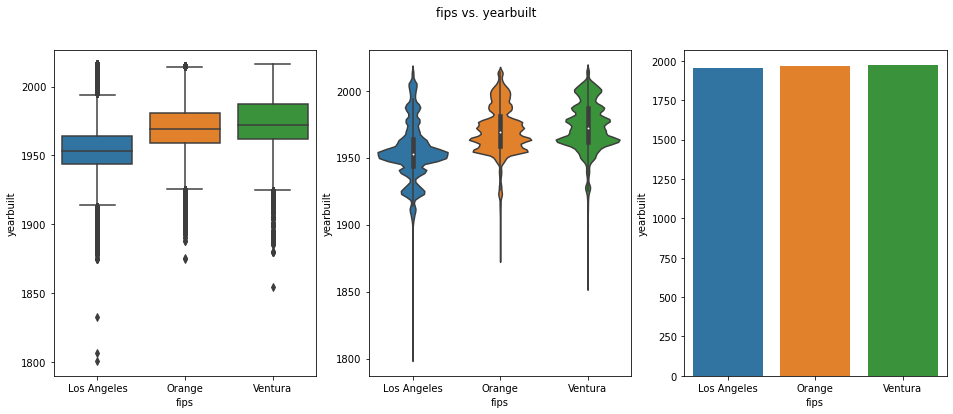

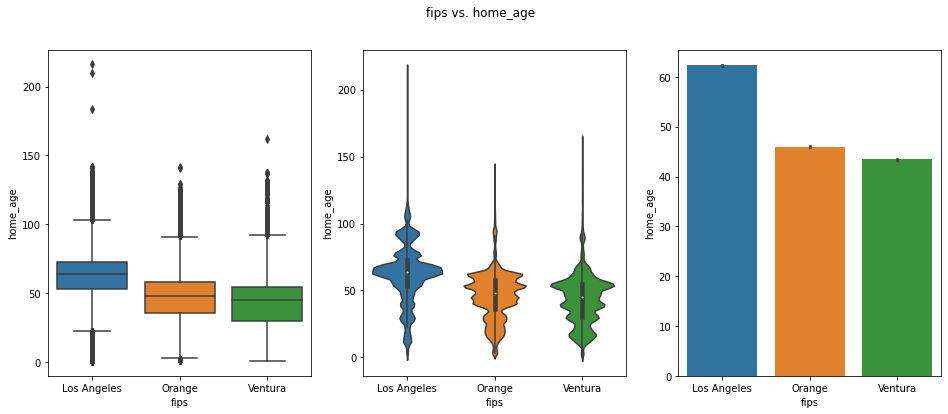

In [98]:
e.plot_categorical_and_continuous_vars(train,cat_vars, cont_vars)

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

Taxamount seems to be a strong indicator of tax_value. Bathrooms and squarefeet are potentialy strong indicators of tax_value.

### 8. Visualize all combinations of variables in some way.

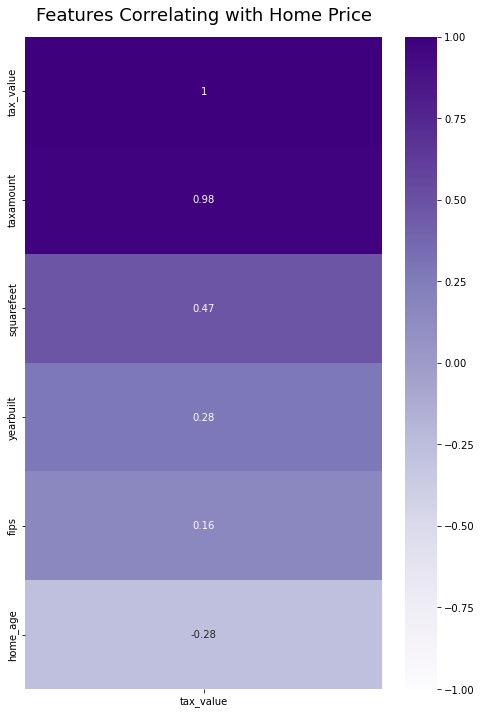

In [140]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')
heatmap.set_title('Features Correlating with Home Price', fontdict={'fontsize':18}, pad=16);

### 9. Run the appropriate statistical tests where needed.

In [110]:
# Relabeling FIPS data fir pearson test
train['fips'] = train.fips.replace({'Los Angeles': 6037,
                   'Orange': 6059,
                   'Ventura':6111})

In [117]:
# setting continuous variables
cont_vars=['taxamount', 'tax_value', 'yearbuilt', 'home_age']

['taxamount', 'tax_value', 'yearbuilt', 'home_age']

In [118]:
# setting categorical variables
cat_vars=['bathroom', 'bedroom', 'fips']

['bathroom', 'bedroom', 'fips']

**continuos variables test**

In [149]:
# spearmanr for continuous variables
for i in cont_vars:
    corr, p = stats.spearmanr(train[i], train.tax_value)
    print('_____________________________________________________')
    print(f'{i} correlation {corr}, p-val{p}')
    if p < α:
        print('We reject the null hypothesis.')
        print(f'There is a correlation between tax_value and {i}')
    else:
        print('We fail to reject the null hypothesis.')
        print(f'There is no correlation between tax_value and {i}')

_____________________________________________________
taxamount correlation 0.9765747511713496, p-val0.0
We reject the null hypothesis.
There is a correlation between tax_value and taxamount
_____________________________________________________
tax_value correlation 1.0, p-val0.0
We reject the null hypothesis.
There is a correlation between tax_value and tax_value
_____________________________________________________
yearbuilt correlation 0.2757668623662481, p-val0.0
We reject the null hypothesis.
There is a correlation between tax_value and yearbuilt
_____________________________________________________
home_age correlation -0.2757668623662481, p-val0.0
We reject the null hypothesis.
There is a correlation between tax_value and home_age


In [148]:
# pearsonr r for continuous variables
for i in cont_vars:
    α =0.05
    corr, p = stats.pearsonr(train[i], train.tax_value)
    print('_____________________________________________________')
    print(f'{i} correlation {corr}, p-val{p}')
    if p < α:
        print('We reject the null hypothesis.')
        print(f'There is a correlation between tax_value and {i}')
    else:
        print('We fail to reject the null hypothesis.')
        print(f'There is no correlation between tax_value and {i}')


_____________________________________________________
taxamount correlation 0.9734319001002679, p-val0.0
We reject the null hypothesis.
There is a correlation between tax_value and taxamount
_____________________________________________________
tax_value correlation 1.0, p-val0.0
We reject the null hypothesis.
There is a correlation between tax_value and tax_value
_____________________________________________________
yearbuilt correlation 0.2745994290397197, p-val0.0
We reject the null hypothesis.
There is a correlation between tax_value and yearbuilt
_____________________________________________________
home_age correlation -0.2745994290397197, p-val0.0
We reject the null hypothesis.
There is a correlation between tax_value and home_age


In [158]:
train[train.fips==6037]

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips,home_age
717802,3.0,1.0,1444.0,186626.0,1951.0,2317.93,6037,66
91875,2.0,1.0,1171.0,457654.0,1941.0,5390.11,6037,76
1390318,5.0,3.0,2045.0,452403.0,1947.0,5639.63,6037,70
1287692,3.0,2.0,1874.0,194212.0,1957.0,2747.44,6037,60
1338,3.0,2.0,1204.0,78034.0,1939.0,1128.49,6037,78
...,...,...,...,...,...,...,...,...
330469,3.0,1.0,964.0,134549.0,1960.0,1906.33,6037,57
921153,4.0,2.0,1738.0,286795.0,1941.0,3611.71,6037,76
1514878,4.0,3.0,1677.0,436404.0,1992.0,6133.59,6037,25
122849,3.0,2.0,1002.0,169685.0,1979.0,2209.40,6037,38


**categorical variables test**

In [159]:
# anova test for fips
f, p = stats.f_oneway(train[train.fips==6037].tax_value, train[train.fips==6111].tax_value, train[train.fips==6059].tax_value)

In [160]:
f,p

(13744.37297403946, 0.0)

Since pval is less than 0 there is a significant diffirence in the tax value of different fips.

In [121]:
train.bathroom.mean()

2.145737780765235

In [122]:
train.bedroom.mean()

3.259218876851763

??? not sure how to do this one
for i in cont_vars:
    overall_mean = train.mean()
    t, p = stats.ttest_1samp(i,overall_mean)
    

#### ANOVA TEST for binned bathrooms

In [129]:
train.bathroom.value_counts()

2.00    524090
1.00    229801
3.00    228869
2.50     78785
4.00     36847
1.50     17329
3.50     13538
5.00      8162
4.50      6853
5.50       734
0.00       514
0.50         6
1.75         2
Name: bathroom, dtype: int64

In [130]:
train.bedroom.value_counts()

3.0    530246
4.0    338646
2.0    184548
5.0     69960
1.0     12693
6.0      9437
Name: bedroom, dtype: int64

In [175]:
one = train[train.bathroom.between(0,1.5,inclusive='both')]
two = train[train.bathroom.between(1.5,2.5,inclusive='right')]
three = train[train.bathroom.between(2.5,3.5,inclusive='right')]
four = train[train.bathroom.between(3.5,4.5,inclusive='right')]
five_plus = train[train.bathroom.between(4.5,100,inclusive='right')]


In [173]:
train[train.bathroom > 5.5]

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips,home_age


In [174]:
# levene test
stat, pval = stats.levene(one.tax_value,two.tax_value,three.tax_value, four.tax_value, five_plus.tax_value)
pval

0.0

In [176]:
# anova test
f, p = stats.f_oneway(one.tax_value,two.tax_value,three.tax_value, four.tax_value, five_plus.tax_value)
f, p

(72089.2534475007, 0.0)

Since pval is less than alpha there is a significant difference between the different bathrooms sizes and tax_value mean

#### ANNOVA TEST bedrooms binned

In [182]:
bed_one = train[train.bedroom.between(0,1.5,inclusive='both')]
bed_two = train[train.bedroom.between(1.5,2.5,inclusive='right')]
bed_three = train[train.bedroom.between(2.5,3.5,inclusive='right')]
bed_four = train[train.bedroom.between(3.5,4.5,inclusive='right')]
bed_five = train[train.bedroom.between(4.5,5.5,inclusive='right')]
bed_six_plus = train[train.bedroom.between (5.5, 100,inclusive ='right')]

In [181]:
train.bedroom.value_counts()

3.0    530246
4.0    338646
2.0    184548
5.0     69960
1.0     12693
6.0      9437
Name: bedroom, dtype: int64

In [183]:
# levene test
stat, pval = stats.levene(bed_one.tax_value,bed_two.tax_value,bed_three.tax_value, bed_four.tax_value, bed_five.tax_value, bed_six_plus.tax_value)
pval

0.0

In [184]:
# anova test
f, p = stats.f_oneway(bed_one.tax_value,bed_two.tax_value,bed_three.tax_value, bed_four.tax_value, bed_five.tax_value, bed_six_plus.tax_value)

In [185]:
f, p

(16551.38860487585, 0.0)

Since pval is less than alpha there is a significant difference between the different bedroom sizes and tax_value mean

### 10. What independent variables are correlated with the dependent variable, home value?

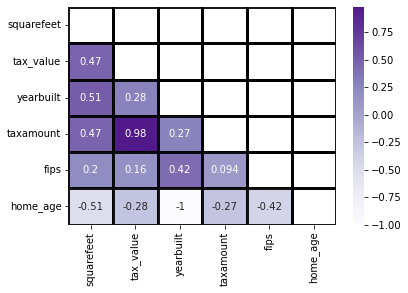

In [186]:
# correaltion between variables
zillow_corr = train.corr(method='spearman')
zillow_corr

# pass my correlation matrix to Seaborn's heatmap 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr), **kwargs)
plt.show()